## Exploratory Data Analysis(EDA) With Python

Data analytics is concerned with examining,transforming and arranging raw data so that we can study, extract meaningful information and make inferences from it. Data analytics is a broad field that combines statistics, computer science and domain knowledge such as business knowledge to reach a goal. An easy way to understand data analytics is by examining its types. There are five(5) types of data analytics: 

- Descriptive concerned with determining what happened
- Diagonistic explains why things happen
- Predictive tries to show us what will happen in the future
- Prescriptive give insights on what actions should be taken to achieve a target
- Cognitive concerned with mimicking human cognitive capabilities such as self-learning, automatic decison making among others using data. 
 
A data analysis task may involve more than one of these types and is not limited to a particular goal. Sometimes, a data analysts may need guidiance in choosing the goal or target for the problem. **Exploratory data analysis(EDA)** involves understanding your dataset before deciding how best to manipulate it to get the answers you want.

EDA is used investigate the dataset and summarize their main characteristics. It shows what the data can reveal beyond the formal hypothesis testing task and provides a better understanding of the dataset variables and the relationship between them. It can help data analysts determine the best statistical techniques to use. EDA helps stakeholders by confirming they are asking the right questions. Once EDA is complete, its insight can then be used for further data analysis.

### Preparations

Python is an interpreted, object oriented programming language with dynamic typing and dynamic binding for rapid application development. It can be used as a scritpting language and has a rich set of open source libraries for data analysis. For example Pandas, Matplotlib, numpy among others. Having a good knowledge of the libraries will enable you understand this notebook. A great book for this is [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

To begin, We import the needed library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sets the backend of matplotlib to the inline backend
%matplotlib inline 

plt.style.use('bmh')

### Load the dataset

Nothing can be done as a data analyst without having any data. In this instance, a dataset of covid-19 cases in New York is avaliable as a CSV file for our use. In some cases a data analyst is required to identify all the available dataset of the company and extract it into a usable format. At this point skills for working with data management systems are needed. These include knowledge of DBMS (MYSQL, MongoDB etc), Querying databases, retrieving unstructured data, distributed storage(Hadoop, Apache spark etc) among others.

**Pandas** is a popular package for data science that offers powerful and flexible data structures for holding data in memory. A dataset loaded into Pandas is primarily stored as a dataframe. A DataFrame is two dimensional labeled data structure with columns of different data types. It is made up of three parts: index, columns and data. A one-dimensional labeled array capable of any data type with axis or index is called a pandas series.

In [31]:
df=pd.read_csv("new-york-history.csv") #loads the data

##View the some recrods in the data set
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-01,NY,38577.0,NaN,80,NaN,89995.0,89995.0,5307.0,0,...,38281073,174158,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2021-02-28,NY,38497.0,NaN,90,NaN,89995.0,89995.0,5259.0,0,...,38106915,273720,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2021-02-27,NY,38407.0,NaN,86,NaN,89995.0,89995.0,5445.0,0,...,37833195,285307,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2021-02-26,NY,38321.0,NaN,94,NaN,89995.0,89995.0,5626.0,0,...,37547888,291189,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2021-02-25,NY,38227.0,NaN,92,NaN,89995.0,89995.0,5703.0,0,...,37256699,278942,NaN,NaN,NaN,NaN,NaN,0,NaN,0


A view of the first 5 rows in the data shows us the column names and type of values in the data. This is a basic data exploration - seeing the values in your dataset and knowing the column names. From the table of a few records, there exist many records with NaNs. This tell says the data must cleaned before analysis. The dataset has many columns and intuitively, there is a question about the relevant features. The presence of date column also give insight that a better way to approach this dataset is by analysing trends.

First, get more details about Null values in the dataset. 

In [32]:
df.info() #Give us more information about individual columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              365 non-null    object 
 1   state                             365 non-null    object 
 2   death                             352 non-null    float64
 3   deathConfirmed                    1 non-null      float64
 4   deathIncrease                     365 non-null    int64  
 5   deathProbable                     0 non-null      float64
 6   hospitalized                      346 non-null    float64
 7   hospitalizedCumulative            346 non-null    float64
 8   hospitalizedCurrently             350 non-null    float64
 9   hospitalizedIncrease              365 non-null    int64  
 10  inIcuCumulative                   0 non-null      float64
 11  inIcuCurrently                    341 non-null    float64
 12  negative

### Data Cleaning
Data cleaning is the process of transforming your dataset to be fit for data analysis. It involves throwing away, replacing and/or filling missing valuse/errors.

During data exploration process, errors,missing values and/or currupt record may be present in the data. For example, it is observed that only 15 columns have complete 365 records. The other columns have variable length data. Some have data within the range of 70-95%, 50-69% of the total number of records. Other have number of values below 30% to 0% of the total number of records. The data analyst can decide to the 15 columns with complete records or chose a valid percentage cut off for number of records and drop columns that do not reach the threshold. 

The latter option is employed here. Not null values of 30% the total number of records is a good threshold as each column must have a minimum of 109 records. 

In [44]:
df.date=df['date'].apply(lambda _: pd.to_datetime(_, format='%Y/%m/%d'))
# df['date']=df['date'].astype('datetime64[ns]') #Convert date to date time

df2 = df[[column for column in df if df[column].count()/len(df)>=0.3]]
#This uses list comprehension to remove columns that have less not null values than 30% of the total number of rows.
#count() method does not count null values
df2.head()

,date,state,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,2021-03-01,NY,38577.0,80,89995.0,89995.0,5307.0,0,1065.0,0,741.0,1636680,6235,0,38281073,174158,38281073,174158,0,0
1,2021-02-28,NY,38497.0,90,89995.0,89995.0,5259.0,0,1083.0,0,728.0,1630445,7580,0,38106915,273720,38106915,273720,0,0
2,2021-02-27,NY,38407.0,86,89995.0,89995.0,5445.0,0,1121.0,0,753.0,1622865,8141,0,37833195,285307,37833195,285307,0,0
3,2021-02-26,NY,38321.0,94,89995.0,89995.0,5626.0,0,1132.0,0,771.0,1614724,8204,0,37547888,291189,37547888,291189,0,0
4,2021-02-25,NY,38227.0,92,89995.0,89995.0,5703.0,0,1124.0,0,774.0,1606520,8746,0,37256699,278942,37256699,278942,0,0


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              365 non-null    datetime64[ns]
 1   state                             365 non-null    object        
 2   death                             352 non-null    float64       
 3   deathIncrease                     365 non-null    int64         
 4   hospitalized                      346 non-null    float64       
 5   hospitalizedCumulative            346 non-null    float64       
 6   hospitalizedCurrently             350 non-null    float64       
 7   hospitalizedIncrease              365 non-null    int64         
 8   inIcuCurrently                    341 non-null    float64       
 9   negativeIncrease                  365 non-null    int64         
 10  onVentilatorCurrently             299 non-null    

This dataset is the features set that we need for effective analytic process. At this point, note that you can approach cleaning this dataset using a different method. I will like to know of another way to handle this.


### Exploration of the data
In the next steps, a further understanding of each feature is performed. As the exploration process continues, the uneven records may be droped. 

This dataset may be best handled using subsetting according to the question you want to answer. Then rows with NaNs in the selected feauture set can be dropped.

In [35]:
df2.describe() #this gives basic statistics information on each feature of the dataset 

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
count,352.000000,365.000000,346.000000,346.000000,350.000000,365.000000,341.000000,365.0,299.000000,3.650000e+02,365.000000,365.0,3.650000e+02,365.000000,3.650000e+02,365.000000,365.0,365.0
mean,24492.573864,105.690411,83892.020231,83892.020231,4524.545714,246.561644,1107.146628,0.0,455.581940,5.668792e+05,4484.054795,0.0,1.182384e+07,104879.652055,1.182384e+07,104879.652055,0.0,0.0
std,8251.347634,164.560170,17811.379509,17811.379509,4648.109275,648.615512,1292.114893,0.0,478.763132,4.070985e+05,4612.420366,0.0,1.116992e+07,75728.760648,1.116992e+07,75728.760648,0.0,0.0
min,3.000000,0.000000,1531.000000,1531.000000,325.000000,0.000000,109.000000,0.0,47.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
25%,24432.500000,8.000000,89995.000000,89995.000000,782.250000,0.000000,170.000000,0.0,82.500000,3.717110e+05,749.000000,0.0,2.113777e+06,49973.000000,2.113777e+06,49973.000000,0.0,0.0
50%,25360.000000,34.000000,89995.000000,89995.000000,2582.500000,0.000000,636.000000,0.0,212.000000,4.347560e+05,2026.000000,0.0,8.263033e+06,79303.000000,8.263033e+06,79303.000000,0.0,0.0
75%,26970.500000,138.000000,89995.000000,89995.000000,7338.500000,0.000000,1459.000000,0.0,796.500000,6.479800e+05,7866.000000,0.0,1.942150e+07,160164.000000,1.942150e+07,160164.000000,0.0,0.0
max,38577.000000,951.000000,89995.000000,89995.000000,18825.000000,3424.000000,5225.000000,0.0,2425.000000,1.636680e+06,19942.000000,0.0,3.828107e+07,324671.000000,3.828107e+07,324671.000000,0.0,0.0


### Independent feature

Selecting this feature is highly dependent on your domain knowledge, meeting with stackholders and the target of the data analysis project. With a dataset on Covid-19, a target or dependent variable to consider is number of deaths per day.

Let's continue with an exploration of number of deaths from Covid-19 in New York

In [46]:
death_df=df2[['date','death']].dropna()

#to confirm that the NaN values were dropped
print("Length of the subset: {}, length of the original dataset {}"
      .format(len(death_df),len(df2['death'])) )
death_df.head()             

Length of the subset: 352, length of the original dataset 365


,date,death
0,2021-03-01,38577.0
1,2021-02-28,38497.0
2,2021-02-27,38407.0
3,2021-02-26,38321.0
4,2021-02-25,38227.0


Text(0, 0.5, 'Number of deaths')

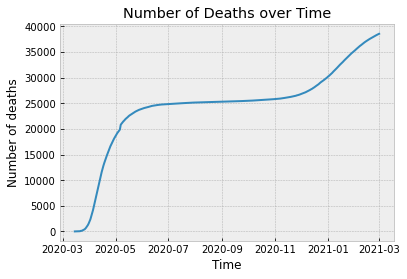

In [47]:
plt.plot(death_df['date'],death_df['death'])
plt.title('Number of Deaths over Time')
plt.xlabel('Time')
plt.ylabel('Number of deaths')

A sharp increase in number of deaths is observed from march 2020 to around April 2020 and then a gradual rise until late june. This is followed by a  constant daily death rate between July and late October 2020. Subsequently, a rise is observed from november 2020 to march 2021. We observe that there are two types of trends in the date rate in New York. A increase and static.

Let's view the distribution of the deaths to gain more insight into covid-19 deaths in new york

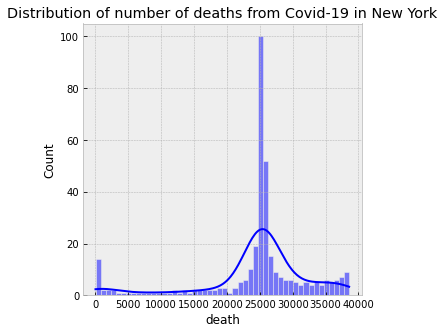

In [55]:
plt.figure(figsize=(5,5))
plt.title('Distribution of number of deaths from Covid-19 in New York')
sns.histplot(death_df['death'], stat='count',bins=50,kde=True)
plt.show()

What does the shape tell us? Is this a normal distribution? Is this data better analyzed using a split of the time duration?

See you next time with more on this

#### Numerical Columns

Let's Plot the columns with numerical values only to view their distributions. Only date and state will be exempted from this subset.

More discussions on these will ensue next time

In [58]:
list(df2.dtypes.tolist()) #view the datatypes present in the dataset

[dtype('<M8[ns]'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [57]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,38577.0,NaN,80,NaN,89995.0,89995.0,5307.0,0,NaN,1065.0,...,38281073,174158,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,38497.0,NaN,90,NaN,89995.0,89995.0,5259.0,0,NaN,1083.0,...,38106915,273720,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,38407.0,NaN,86,NaN,89995.0,89995.0,5445.0,0,NaN,1121.0,...,37833195,285307,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,38321.0,NaN,94,NaN,89995.0,89995.0,5626.0,0,NaN,1132.0,...,37547888,291189,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,38227.0,NaN,92,NaN,89995.0,89995.0,5703.0,0,NaN,1124.0,...,37256699,278942,NaN,NaN,NaN,NaN,NaN,0,NaN,0


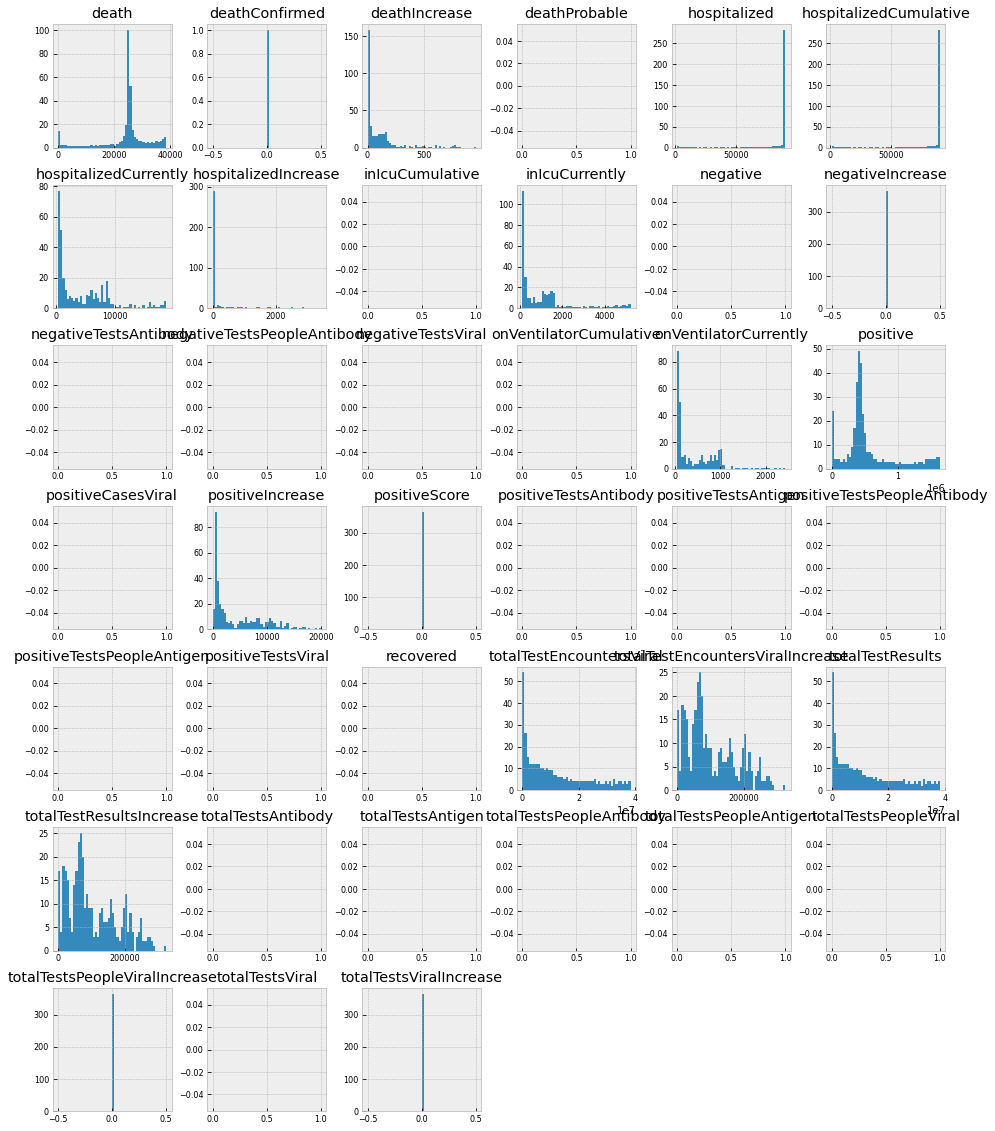

In [59]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

## Sources

- [What is Data Analytics?](https://www.mastersindatascience.org/learning/what-is-data-analytics/)
- [A beginners guide to data science pipelin](https://towardsdatascience.com/a-beginners-guide-to-the-data-science-pipeline-a4904b2d8ad3)
- [Exploratory Data Analysis](https://www.ibm.com/cloud/learn/exploratory-data-analysis)